In [1]:
import pandas as pd

## Part 1 of submission

Here we state the url of the website we take the data from.

In [2]:
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [3]:
df0=pd.read_html(url)

In [4]:
df=df0[0]
df

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


Next, we remove Not Assigned Boroughs and replace Not Assigned Neighborhound with the respective Borough.

In [5]:
df1 = df[df['Borough'] != 'Not assigned']
df1['Neighbourhood'].replace("Not assigned", df1["Borough"],inplace=True)
df1

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [6]:
df1.shape

(103, 3)

## Part 2 of submission

Then, get the geographical coordinates of each Postal code and merge them respectively to our table using concat. 
The setting of Postal Code as index was due to being in both tables, thus utilised for the merging of tables.  

In [7]:
!wget -q -O "Geospatial_Coordinates.csv" http://cocl.us/Geospatial_data
coordinates = pd.read_csv('Geospatial_Coordinates.csv')
coordinates.head(5)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
df1Index = df1.set_index('Postal Code')
coordinatesIndex = coordinates.set_index('Postal Code')
df3 = pd.concat([df1Index, coordinatesIndex], axis=1, join='inner')

df3.index.name = 'Postal Code'
df3.reset_index(inplace=True)

df3.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


## Part 3 of submission

Download dependencies needed

In [9]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium

print('Libraries imported.')


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                  /    /failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.12|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|3.6.9|3.6.9|3.6.9|>=2.7,<2.8.0a0|3.6.9|>=3.5,<3.6.0a0|3.4.*',build='0_73_pypy|2_73_pypy|3_73_pypy|4_73_pypy|1_73_pypy']
  - geopy -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']
  - rsa -> python[version='2.7.*|3

Libraries imported.


Get the coordinates of Toronto.

In [10]:
address = 'Toronto, M'

geolocator = Nominatim(user_agent="M_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.7263287, -79.4518396.


In [11]:
df4 =df3[df3['Borough'] == 'East Toronto'].reset_index(drop=True)
df4.head(10)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558


Get the coordinates of East Toronto and visualise the Neighbourhoods

In [12]:
address = 'East Toronto, M'

geolocator = Nominatim(user_agent="M_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of East Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of East Toronto are 43.7263287, -79.4518396.


In [13]:
map_East_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df4['Latitude'], df4['Longitude'], df4['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_East_Toronto)  
    
map_East_Toronto

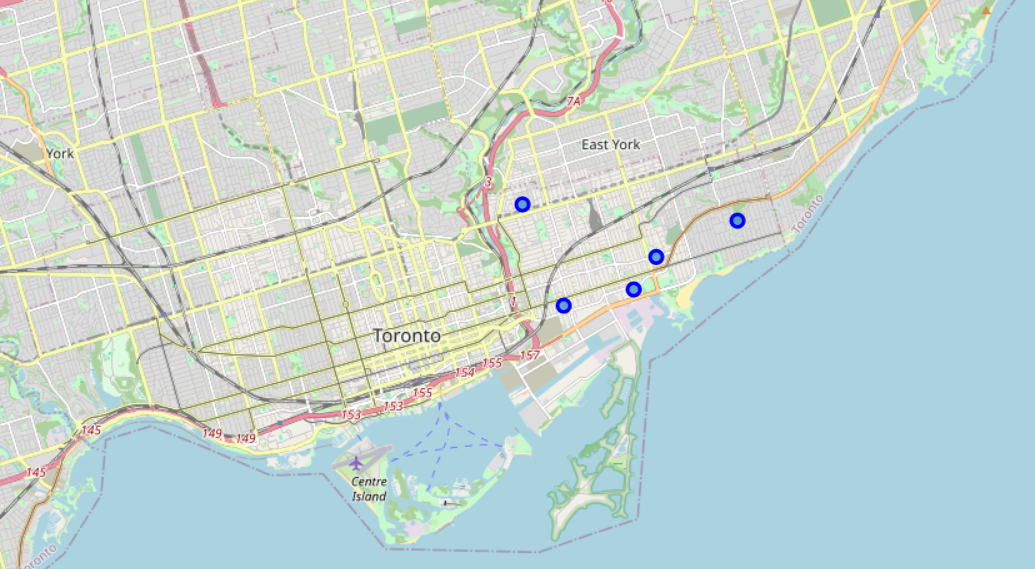

Define Foursquare Credentials and Version

In [14]:
CLIENT_ID = '' # my private Foursquare ID
CLIENT_SECRET = '' # my private Foursquare Secret
VERSION = '' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [15]:
df4.loc[0, 'Neighbourhood']

'The Beaches'

Explore East Toronto Neighborhoods.
Using all neighborhood's name, latitude and longitude values, we create a function which gets the top 100 venues that are within a radius of 500 meters of each neighborhoud. 

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create a new dataframe by running the above function on each neighborhoud.

In [17]:
df4_Venues = getNearbyVenues(names=df4['Neighbourhood'],
                                   latitudes=df4['Latitude'],
                                   longitudes=df4['Longitude'])

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Business reply mail Processing Centre, South Central Letter Processing Plant Toronto


Here we check, the dataframe's size, venues returned for each neighborhoud and number of unique venue categories.  

In [18]:
print(df4_Venues.shape)
df4_Venues.head()

(119, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [19]:
df4_Venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16
"India Bazaar, The Beaches West",20,20,20,20,20,20
Studio District,36,36,36,36,36,36
The Beaches,4,4,4,4,4,4
"The Danforth West, Riverdale",43,43,43,43,43,43


In [20]:
print('There are {} uniques categories.'.format(len(df4_Venues['Venue Category'].unique())))

There are 68 uniques categories.


Analyze Each Neighborhood

In [21]:
# one hot encoding, representating Venue Category's categorical data into numbers.
df4_onehot = pd.get_dummies(df4_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df4_onehot['Neighbourhood'] = df4_Venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [df4_onehot.columns[-1]] + list(df4_onehot.columns[:-1])
df4_onehot = df4_onehot[fixed_columns]

df4_onehot.head()

,Neighbourhood,American Restaurant,Auto Workshop,Bakery,Bank,Bar,Board Shop,Bookstore,Brewery,Bubble Tea Shop,Burrito Place,Café,Caribbean Restaurant,Cheese Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Coworking Space,Dessert Shop,Diner,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Middle Eastern Restaurant,Movie Theater,Neighborhood,Park,Pet Store,Pizza Place,Pub,Recording Studio,Restaurant,Sandwich Place,Seafood Restaurant,Skate Park,Smoke Shop,Spa,Stationery Store,Steakhouse,Sushi Restaurant,Thai Restaurant,Tibetan Restaurant,Trail,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df4_onehot.shape

(119, 69)

Group rows by neighborhood, using the mean frequency of occurrence of each venue category

In [23]:
df4_grouped = df4_onehot.groupby('Neighbourhood').mean().reset_index()
df4_grouped

,Neighbourhood,American Restaurant,Auto Workshop,Bakery,Bank,Bar,Board Shop,Bookstore,Brewery,Bubble Tea Shop,Burrito Place,Café,Caribbean Restaurant,Cheese Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Coworking Space,Dessert Shop,Diner,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Middle Eastern Restaurant,Movie Theater,Neighborhood,Park,Pet Store,Pizza Place,Pub,Recording Studio,Restaurant,Sandwich Place,Seafood Restaurant,Skate Park,Smoke Shop,Spa,Stationery Store,Steakhouse,Sushi Restaurant,Thai Restaurant,Tibetan Restaurant,Trail,Yoga Studio
0,"Business reply mail Processing Centre, South C...",0.000000,0.0625,0.000000,0.000000,0.000000,0.00,0.000000,0.062500,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.0625,0.00,0.000000,0.000000,0.000000,0.000000,0.0625,0.0625,0.000000,0.000000,0.000000,0.000000,0.00,0.062500,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.00,0.000000,0.062500,0.000000,0.062500,0.000000,0.0625,0.062500,0.00,0.000000,0.0625,0.0625,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000
1,"India Bazaar, The Beaches West",0.000000,0.0000,0.000000,0.000000,0.000000,0.05,0.000000,0.050000,0.000000,0.0500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.1000,0.05,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.00,0.050000,0.000000,0.050000,0.000000,0.000000,0.000000,0.0000,0.050000,0.000000,0.000000,0.05,0.000000,0.100000,0.050000,0.050000,0.050000,0.0000,0.050000,0.05,0.000000,0.0000,0.0000,0.000000,0.000000,0.05,0.05,0.000000,0.000000,0.000000,0.000000
2,Studio District,0.055556,0.0000,0.055556,0.027778,0.027778,0.00,0.027778,0.055556,0.000000,0.0000,0.055556,0.000000,0.027778,0.027778,0.083333,0.027778,0.0000,0.027778,0.000000,0.027778,0.000000,0.027778,0.0000,0.0000,0.00,0.027778,0.000000,0.000000,0.000000,0.0000,0.0000,0.055556,0.027778,0.000000,0.000000,0.00,0.027778,0.00,0.027778,0.000000,0.027778,0.000000,0.000000,0.027778,0.0000,0.000000,0.000000,0.027778,0.00,0.027778,0.027778,0.027778,0.000000,0.000000,0.0000,0.000000,0.00,0.027778,0.0000,0.0000,0.000000,0.027778,0.00,0.00,0.027778,0.000000,0.000000,0.027778
3,The Beaches,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.250000,0.000000,0.000000,0.000000,0.250000,0.0000,0.000000,0.00,0.000000,0.0000,0.0000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.250000,0.000000
4,"The Danforth West, Riverdale",0.023256,0.0000,0.023256,0.000000,0.000000,0.00,0.046512,0.023256,0.023256,0.0000,0.023256,0.023256,0.000000,0.000000,0.069767,0.000000,0.0000,0.000000,0.023256,0.000000,0.023256,0.000000,0.0000,0.0000,0.00,0.000000,0.023256,0.023256,0.046512,0.0000,0.0000,0.000000,0.000000,0.186047,0.023256,0.00,0.000000,0.00,0.046512,0.023256,0.069767,0.023256,0.023256,0.000000,0.0000,0.023256,0.023256,0.000000,0.00,0.000000,0.000000,0.000000,0.023256,0.023256,0.0000,0.023256,0.00,0.000000,0.0000,0.0000,0.023256,0.000000,0.00,0.00,0.000000,0.023256,0.023256,0.023256


In [24]:
df4_grouped.shape

(5, 69)

Here we show each neighborhood with it's top 5 most common venues

In [25]:
num_top_venues = 5

for hood in df4_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = df4_grouped[df4_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
              venue  freq
0       Pizza Place  0.06
1     Garden Center  0.06
2    Farmers Market  0.06
3              Park  0.06
4  Recording Studio  0.06


----India Bazaar, The Beaches West----
                  venue  freq
0  Fast Food Restaurant  0.10
1                  Park  0.10
2                   Pub  0.05
3        Sandwich Place  0.05
4                   Gym  0.05


----Studio District----
                 venue  freq
0          Coffee Shop  0.08
1  American Restaurant  0.06
2              Brewery  0.06
3            Gastropub  0.06
4                 Café  0.06


----The Beaches----
                       venue  freq
0               Neighborhood  0.25
1                      Trail  0.25
2          Health Food Store  0.25
3                        Pub  0.25
4  Latin American Restaurant  0.00


----The Danforth West, Riverdale----
                    venue  freq
0        Greek Restaurant  

We put this into a dataframe, sorting the venues in descending order and then display the top 10 venues for each neighborhood.

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = df4_grouped['Neighbourhood']

for ind in np.arange(df4_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df4_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Business reply mail Processing Centre, South C...",Garden,Brewery,Light Rail Station,Farmers Market,Park,Gym / Fitness Center,Pizza Place,Burrito Place,Recording Studio,Fast Food Restaurant
1,"India Bazaar, The Beaches West",Fast Food Restaurant,Park,Brewery,Sandwich Place,Movie Theater,Burrito Place,Pet Store,Pizza Place,Pub,Italian Restaurant
2,Studio District,Coffee Shop,Brewery,Gastropub,Café,American Restaurant,Bakery,Bookstore,Bar,Bank,Cheese Shop
3,The Beaches,Neighborhood,Trail,Pub,Health Food Store,Fast Food Restaurant,Cosmetics Shop,Coworking Space,Dessert Shop,Diner,Farmers Market
4,"The Danforth West, Riverdale",Greek Restaurant,Italian Restaurant,Coffee Shop,Bookstore,Ice Cream Shop,Furniture / Home Store,Fruit & Vegetable Store,Japanese Restaurant,Indian Restaurant,Grocery Store


Cluster Neighborhoods using k-means

In [28]:
# set number of clusters to 5
kclusters = 5

df4_grouped_clustering = df4_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df4_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 4, 2, 0], dtype=int32)

 The dataframe below includes the cluster and the top 10 venues for each neighborhood, before visualizing the resulting clusters

In [29]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df4_merged = df4

# merge df4_grouped with df4 to add latitude/longitude for each neighborhood
df4_merged = df4_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

df4_merged.head() 

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,2,Neighborhood,Trail,Pub,Health Food Store,Fast Food Restaurant,Cosmetics Shop,Coworking Space,Dessert Shop,Diner,Farmers Market
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Italian Restaurant,Coffee Shop,Bookstore,Ice Cream Shop,Furniture / Home Store,Fruit & Vegetable Store,Japanese Restaurant,Indian Restaurant,Grocery Store
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,1,Fast Food Restaurant,Park,Brewery,Sandwich Place,Movie Theater,Burrito Place,Pet Store,Pizza Place,Pub,Italian Restaurant
3,M4M,East Toronto,Studio District,43.659526,-79.340923,4,Coffee Shop,Brewery,Gastropub,Café,American Restaurant,Bakery,Bookstore,Bar,Bank,Cheese Shop
4,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,3,Garden,Brewery,Light Rail Station,Farmers Market,Park,Gym / Fitness Center,Pizza Place,Burrito Place,Recording Studio,Fast Food Restaurant


In [30]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df4_merged['Latitude'], df4_merged['Longitude'], df4_merged['Neighbourhood'], df4_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

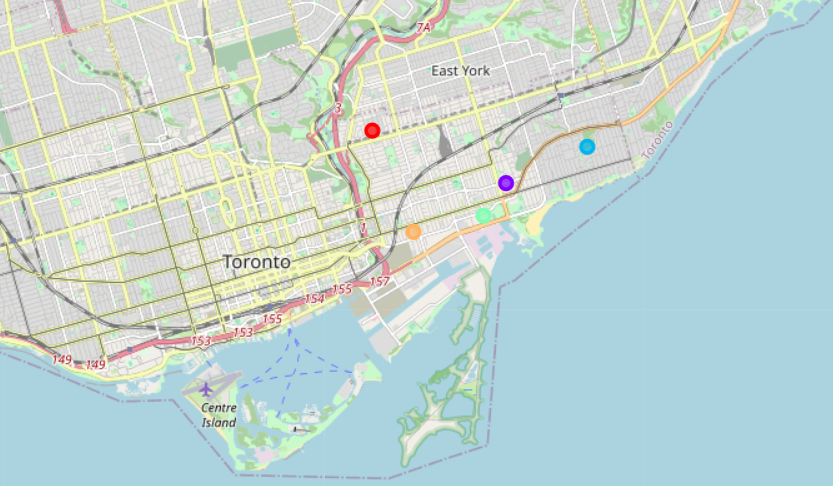

Finally we examine each Cluster, finding the venue categories which differentiate each cluster. 

In [31]:
df4_merged.loc[df4_merged['Cluster Labels'] == 0, df4_merged.columns[[1] + list(range(5, df4_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,East Toronto,0,Greek Restaurant,Italian Restaurant,Coffee Shop,Bookstore,Ice Cream Shop,Furniture / Home Store,Fruit & Vegetable Store,Japanese Restaurant,Indian Restaurant,Grocery Store


In [32]:
df4_merged.loc[df4_merged['Cluster Labels'] == 1, df4_merged.columns[[1] + list(range(5, df4_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,East Toronto,1,Fast Food Restaurant,Park,Brewery,Sandwich Place,Movie Theater,Burrito Place,Pet Store,Pizza Place,Pub,Italian Restaurant


In [33]:
df4_merged.loc[df4_merged['Cluster Labels'] == 2, df4_merged.columns[[1] + list(range(5, df4_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,2,Neighborhood,Trail,Pub,Health Food Store,Fast Food Restaurant,Cosmetics Shop,Coworking Space,Dessert Shop,Diner,Farmers Market


In [34]:
df4_merged.loc[df4_merged['Cluster Labels'] == 3, df4_merged.columns[[1] + list(range(5, df4_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,East Toronto,3,Garden,Brewery,Light Rail Station,Farmers Market,Park,Gym / Fitness Center,Pizza Place,Burrito Place,Recording Studio,Fast Food Restaurant


In [35]:
df4_merged.loc[df4_merged['Cluster Labels'] == 4, df4_merged.columns[[1] + list(range(5, df4_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,East Toronto,4,Coffee Shop,Brewery,Gastropub,Café,American Restaurant,Bakery,Bookstore,Bar,Bank,Cheese Shop
